Данные взяты с сайта kaggle
[данные о продажах маркетплейса Amazon](https://www.kaggle.com/datasets/ammaraahmad/us-ecommerce-record-2020)

In [58]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/amazon_market_data.csv')

df

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


Приведение столбцов к стилю camel_case

In [59]:
# Функция для преобразования в camelCase
def to_camel_case(s):
    parts = s.split('_')
    return parts[0].lower() + ''.join(part.capitalize() for part in parts[1:])

df.columns = [to_camel_case(col) for col in df.columns]

print(df.columns)

Index(['order date', 'row id', 'order id', 'ship mode', 'customer id',
       'segment', 'country', 'city', 'state', 'postal code', 'region',
       'product id', 'category', 'sub-category', 'product name', 'sales',
       'quantity', 'discount', 'profit'],
      dtype='object')


Приведение типов данных

In [61]:
# Приведение столбца 'order date' к типу datetime с обработкой ошибок
df['order date'] = pd.to_datetime(df['order date'], errors='coerce')

# Дополнительно можно проверить наличие NaT значений после преобразования
na_values = df['order date'].isna().sum()
if na_values > 0:
    print(f"Обработано {na_values} неверных значений в 'order date'.")

<ipython-input-61-76e297c2a82f>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order date'] = pd.to_datetime(df['order date'], errors='coerce')


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order date    3312 non-null   datetime64[ns]
 1   row id        3312 non-null   int64         
 2   order id      3312 non-null   object        
 3   ship mode     3312 non-null   object        
 4   customer id   3312 non-null   object        
 5   segment       3312 non-null   object        
 6   country       3312 non-null   object        
 7   city          3312 non-null   object        
 8   state         3312 non-null   object        
 9   postal code   3312 non-null   int64         
 10  region        3312 non-null   object        
 11  product id    3312 non-null   object        
 12  category      3312 non-null   object        
 13  sub-category  3312 non-null   object        
 14  product name  3312 non-null   object        
 15  sales         3312 non-null   float64 

Поиск дублей и пропусков в данных
- Избавляемся от пропусков

In [64]:
# Удаление дубликатов
df = df.drop_duplicates()

# Удаление строк с пропусками
df = df.dropna()

Исследовательский анализ данных

Находим количество уникальных клиентов

In [67]:
# Находим количество уникальных клиентов по 'customerid'
unique_customers_count = df['customer id'].nunique()

print(unique_customers_count)

693


Вывод: Количество уникальных клиентов 693

Находим количество уникальных заказов

In [68]:
# Находим количество уникальных клиентов по 'customerid'
unique_customers_count = df['order id'].nunique()

print(unique_customers_count)

1687


Вывод: Количество уникальных заказов 1687

Изучаем локацию пользователей и визуализируем 20 городов с наибольшим их количеством

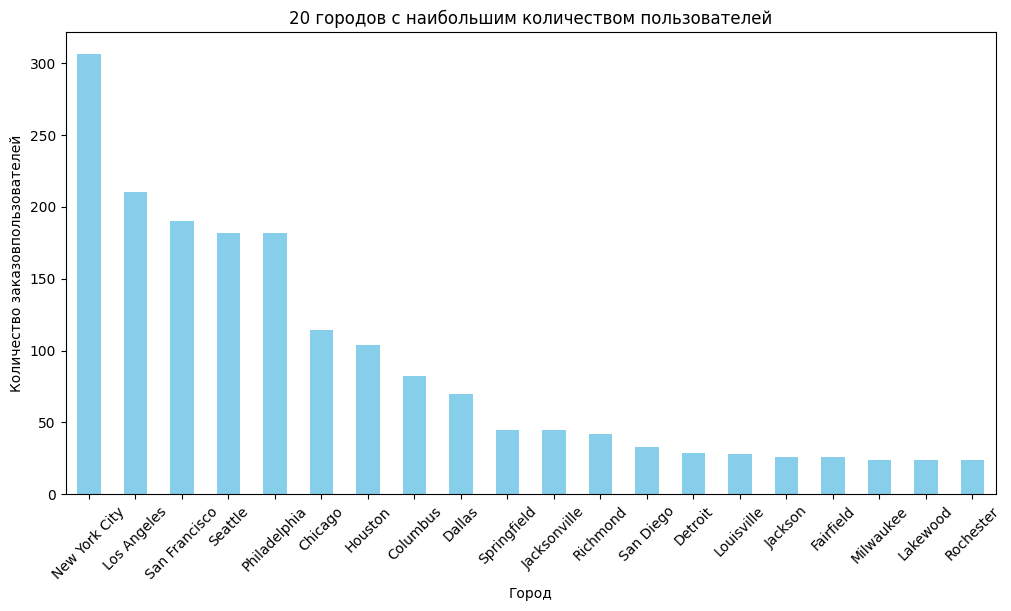

In [74]:
import matplotlib.pyplot as plt

# Подсчитываем количество пользователей по городам
city_counts = df['city'].value_counts().head(20)

# Создаем столбчатую диаграмму
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar', color='skyblue')
plt.title('20 городов с наибольшим количеством пользователей')
plt.xlabel('Город')
plt.ylabel('Количество заказовпользователей')
plt.xticks(rotation=45)
plt.show()

Вывод: Максимальное количество пользователей (более 300) из Нью Йорка

Изучаем динамику кол-ва заказов по дате заказов

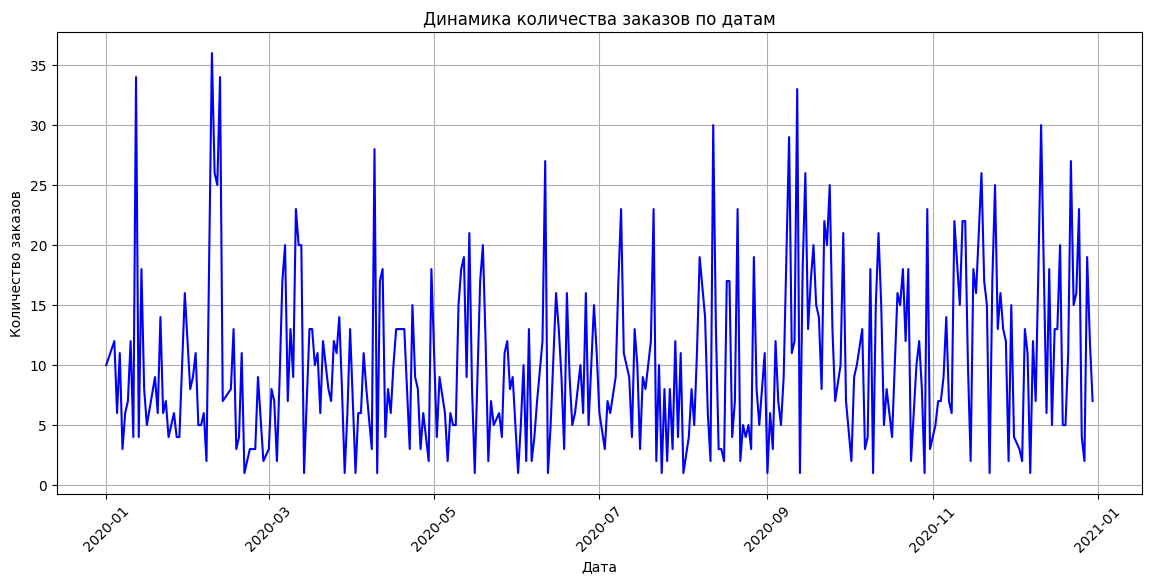

In [75]:
# Группируем данные по дате и считаем количество заказов
orders_per_date = df.groupby(df['order date'].dt.date).size()

# Создаем график
plt.figure(figsize=(14, 6))
orders_per_date.plot(kind='line', color='blue')
plt.title('Динамика количества заказов по датам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Вывод: За 2020 год график имеет пилообразную форму, максимум заказов (до 36 в день) приходится на февраль.

Изучаем динамику продаж по дате заказов

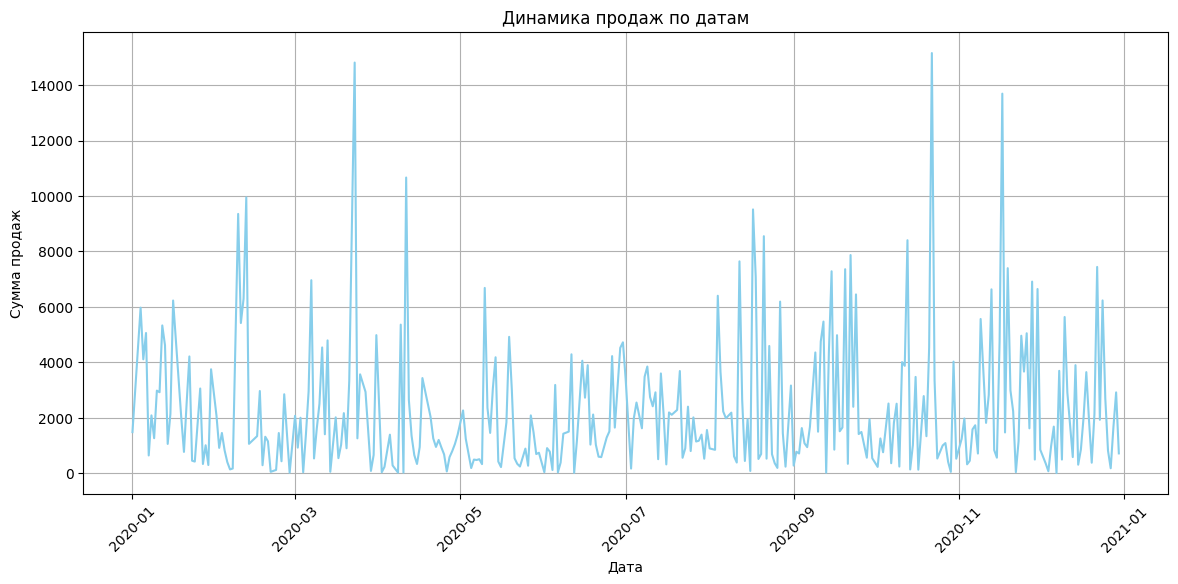

In [85]:
# Группируем данные по дате и суммируем продажи
sales_per_date = df.groupby(df['order date'].dt.date)['sales'].sum()

# Создаем график
plt.figure(figsize=(14, 6))
sales_per_date.plot(kind='line', color='skyblue')
plt.title('Динамика продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Вывод: График суммы продаж так же пилообразный со снижением в летние месяцы. Максимумы (более 14000) приходятся на март и октябрь.

Изучаем распределение продаж по категориям заказов

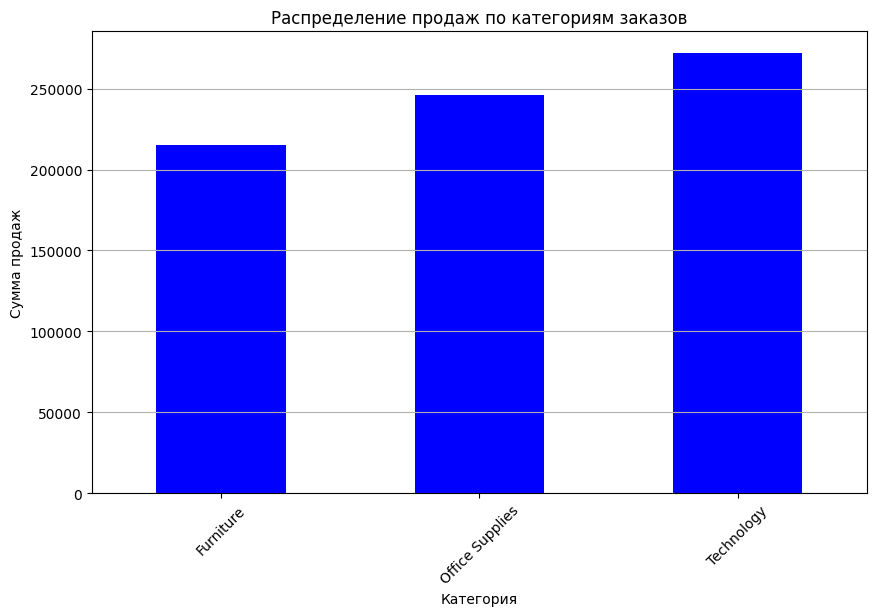

In [86]:
# Подсчитываем сумму продаж по категориям
sales_by_category = df.groupby('category')['sales'].sum()

# Создаем столбчатую диаграмму
plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar', color='blue')
plt.title('Распределение продаж по категориям заказов')
plt.xlabel('Категория')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Выводы: Максимум продаж (более 225000) приходится на категорию Техника

Изучаем распределение продаж по штатам

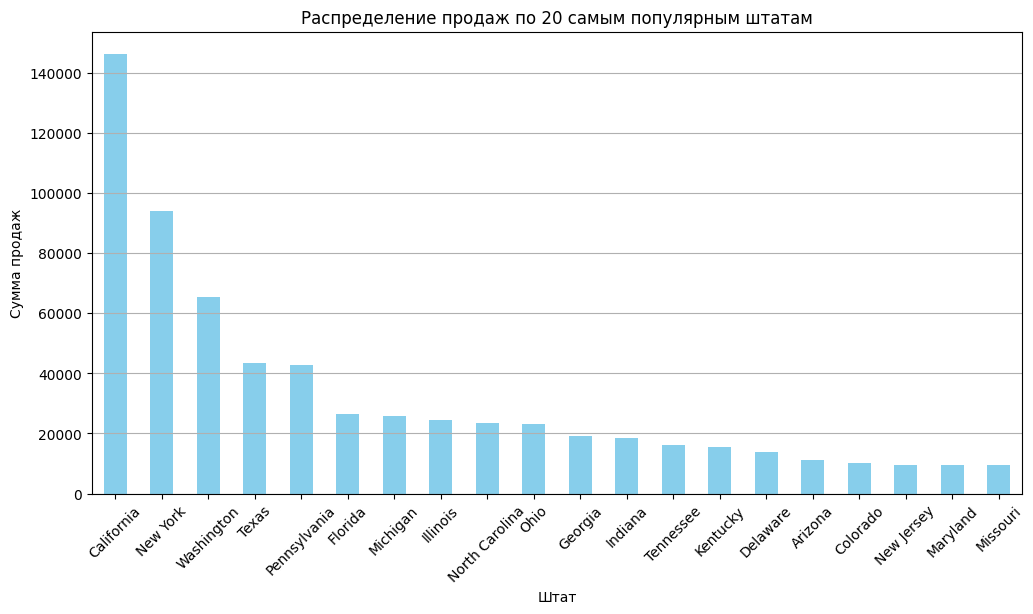

In [87]:
# Подсчитываем сумму продаж по штатам
sales_by_state = df.groupby('state')['sales'].sum().nlargest(20)

# Создаем столбчатую диаграмму
plt.figure(figsize=(12, 6))
sales_by_state.plot(kind='bar', color='skyblue')
plt.title('Распределение продаж по 20 самым популярным штатам')
plt.xlabel('Штат')
plt.ylabel('Сумма продаж')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Вывод: Максимальные продажи (более 140000) приходятся на штат Калифорния.

Находим самые популярные товары (Product Name)

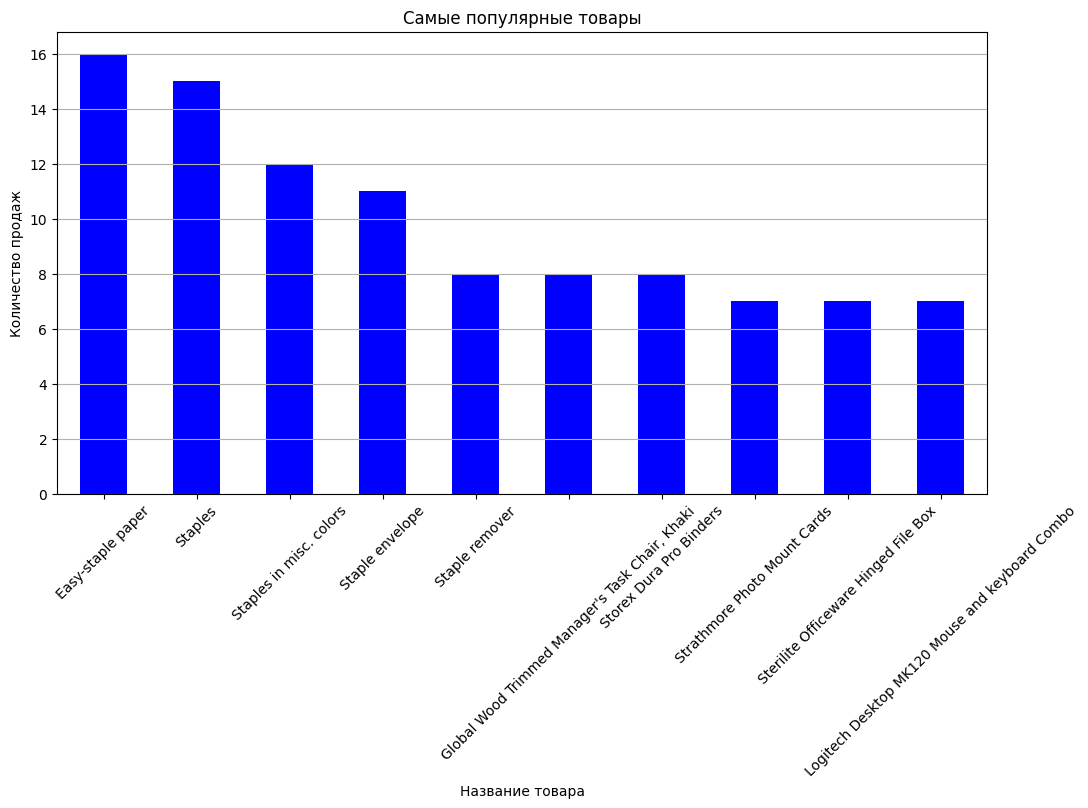

In [88]:
# Подсчитываем количество продаж по названиям товаров
popular_products = df['product name'].value_counts().head(10)

# Создаем столбчатую диаграмму
plt.figure(figsize=(12, 6))
popular_products.plot(kind='bar', color='blue')
plt.title('Самые популярные товары')
plt.xlabel('Название товара')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Вывод: Самый популярный товар по количеству продаж скоро-сшиваемая бумага (16 продаж).

Изучаем распределение категорий внутри штатов

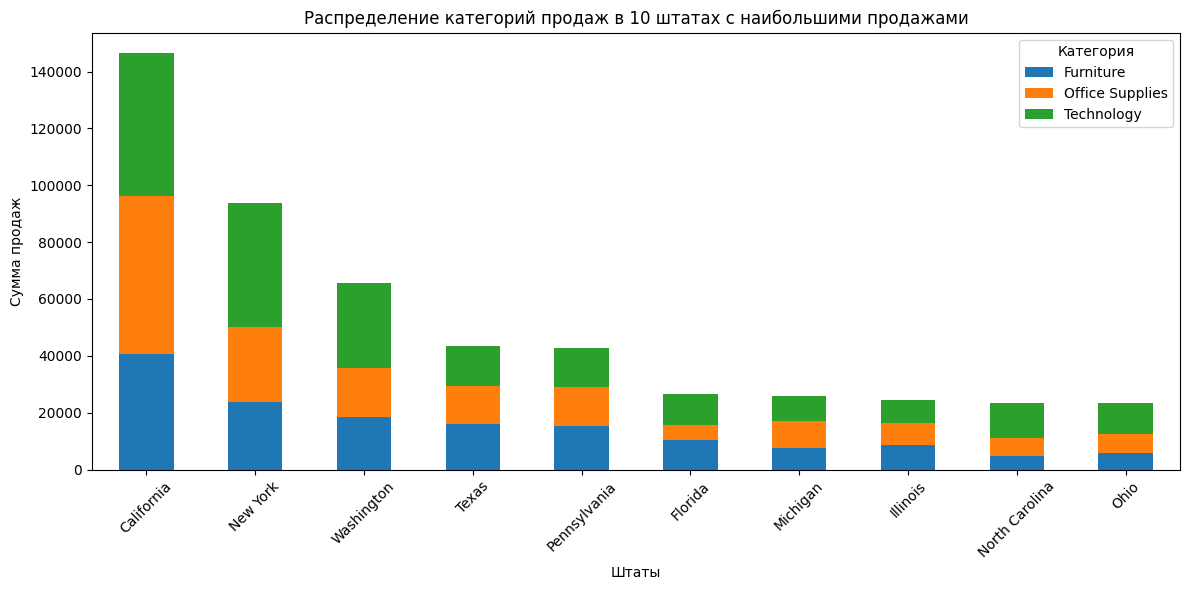

In [83]:
# 1. Группируем по состоянию и суммируем продажи
state_sales = df.groupby('state')['sales'].sum().reset_index()

# 2. Находим 10 штатов с наибольшей суммой продаж
top_states = state_sales.nlargest(10, 'sales')['state']

# 3. Фильтруем исходную таблицу по 10 штатов
filtered_df = df[df['state'].isin(top_states)]

# 4. Группируем по категориям и состояниям, суммируем продажи
category_distribution = filtered_df.groupby(['state', 'category'])['sales'].sum().unstack(fill_value=0)

# 5. Визуализируем распределение категорий
category_distribution = category_distribution.reindex(top_states)  # Упорядочиваем по топовым штатам
category_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))

# 6. Настраиваем график
plt.title('Распределение категорий продаж в 10 штатах с наибольшими продажами')
plt.xlabel('Штаты')
plt.ylabel('Сумма продаж')
plt.legend(title='Категория')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Вывод: Распределение категорий варьируется в зависимости от штата, в разных штатах преобладают различные категории.

Изучаем динамику продаж внутри категорий

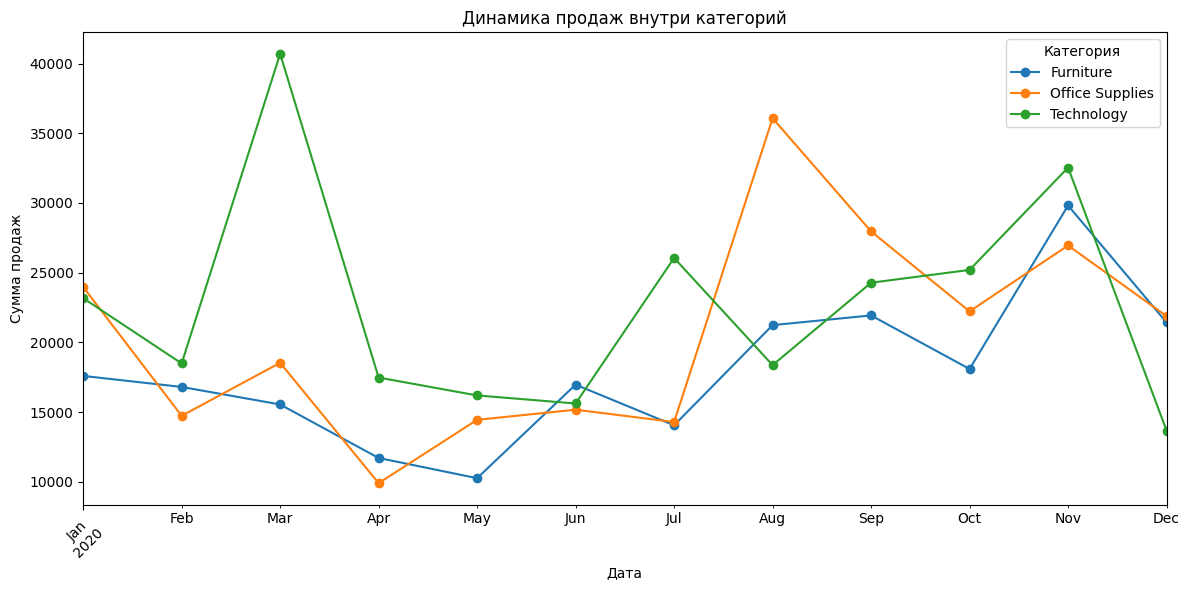

In [84]:
# 1. Группируем по дате и категории, суммируем продажи
sales_trend = df.groupby([df['order date'].dt.to_period('M'), 'category'])['sales'].sum().unstack(fill_value=0)

# 2. Визуализируем динамику продаж по категориям
sales_trend.plot(kind='line', marker='o', figsize=(12, 6))

# 3. Настраиваем график
plt.title('Динамика продаж внутри категорий')
plt.xlabel('Дата')
plt.ylabel('Сумма продаж')
plt.legend(title='Категория')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Вывод: Пики продаж приходятся:
- в категорий Техника на март и ноябрь (41000 и 32000);
- в категории Офисные Материалы на август и ноябрь (36000 и 26000);
- в категории Фурнитура на ноябрь (30000)

ВЫВОДЫ В ФОРМАТЕ НУМИРОВАННОГО СПИСКА
1. Количество уникальных клиентов 693
2. Количество уникальных заказов 1687
3. Максимальное количество пользователей (более 300) из Нью Йорка
4. За 2020 год график имеет пилообразную форму, максимум заказов (до 36 в день) приходится на февраль.
5. График суммы продаж так же пилообразный со снижением в летние месяцы. Максимумы (более 14000) приходятся на март и октябрь.
6. Максимум продаж (более 225000) приходится на категорию Техника
7. Максимальные продажи (более 140000) приходятся на штат Калифорния.
8.Самый популярный товар по количеству продаж скоро-сшиваемая бумага (16 продаж).
9. Распределение категорий варьируется в зависимости от штата, в разных штатах преобладают различные категории.
10.  Пики продаж приходятся:
     - в категорий Техника на март и ноябрь (41000 и 32000);
     - в категории Офисные Материалы на август и ноябрь (36000 и 26000);
     - в категории Фурнитура на ноябрь (30000)